In [0]:
%pip install gcsfs

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Not uninstalling fsspec at /databricks/python3/lib/python3.10/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-4534fb35-2a44-4d6a-ad7c-57f50c582cee
    Can't uninstall 'fsspec'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
petastorm 0.12.1 requires pyspark>=2.1.0, which is not installed.
datasets 2.14.5 requires fsspec[http]<2023.9.0,>=2023.1.0, but you have fsspec 2023.12.2 which is incompatible.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
dbutils.library.restartPython()

In [0]:
bucket_name = 'dcscweather'
mount_point = '/mnt/dcscweather'
project_id = 'smart-athlete-408421' # (most probably a 21 digit numeric code)

# Define the GCS service account credentials
config = {
'fs.gs.project.id': project_id,
'fs.gs.auth.service.account.json.keyfile': '/dbfs/FileStore/tables/smart_athlete_408421_0c2c90e24894.json' # keyfile should be indicating to the abs path of credentials.json
}

# Mount the GCS bucket
dbutils.fs.mount(
f'gs://{bucket_name}',
mount_point,
extra_configs=config
)

---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
File <command-3580889353363307>, line 12
      6 config = {
      7 'fs.gs.project.id': project_id,
      8 'fs.gs.auth.service.account.json.keyfile': '/dbfs/FileStore/tables/smart_athlete_408421_0c2c90e24894.json' # keyfile should be indicating to the abs path of credentials.json
      9 }
     11 # Mount the GCS bucket
---> 12 dbutils.fs.mount(
     13 f'gs://{bucket_name}',
     14 mount_point,
     15 extra_configs=config
     16 )

File /databricks/python_shell/dbruntime/dbutils.py:378, in DBUtils.FSHandler.prettify_exception_message.<locals>.f_with_exception_handling(*args, **kwargs)
    376 exc.__context__ = None
    377 exc.__cause__ = None
--> 378 raise exc

ExecutionError: An error occurred while calling o354.mount.
: java.rmi.RemoteException: java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /

In [0]:
import gcsfs

In [0]:
fs = gcsfs.GCSFileSystem(project='My First Project', token='/dbfs/FileStore/tables/smart_athlete_408421_0c2c90e24894.json')
files = fs.ls('dcscweather', detail=True)
for file in files:
    print(file['name'],file['updated'])

dcscweather/data.csv 2023-12-18T03:06:13.043Z


In [0]:
fs.ls('dcscweather')

['dcscweather/data.csv']

In [0]:
file_location = '/mnt/dcscweather/data.csv'
file_type='csv'
infer_schema='true'
first_row_is_header = 'true'
delimiter =','
df=spark.read.format(file_type) \
    .option('inferSchema',infer_schema) \
    .option('header', first_row_is_header) \
    .option('sep', delimiter) \
    .load(file_location)
display(df)

tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,snow,windspeed,winddir,moonphase,conditions,description,month,day,year
20.8,-1.3,9.0,20.8,-2.7,8.6,-9.7,31.7,0.0,0.0,14.5,160.3,0.64,Clear,Clear conditions throughout the day.,4,1,2021
22.8,4.9,13.6,22.8,3.8,13.2,-9.3,21.3,0.0,0.0,12.0,162.3,0.67,Clear,Clear conditions throughout the day.,4,2,2021
25.7,3.7,15.8,25.7,3.7,15.8,-7.5,22.6,0.0,0.0,14.5,190.3,0.71,Clear,Clear conditions throughout the day.,4,3,2021
25.8,9.4,17.6,25.8,7.7,17.4,-6.0,20.9,0.0,0.0,23.4,266.6,0.75,Clear,Clear conditions throughout the day.,4,4,2021
25.8,9.3,17.9,25.8,9.3,17.9,-6.2,20.4,0.0,0.0,21.0,230.9,0.78,Clear,Clear conditions throughout the day.,4,5,2021
13.8,2.9,8.0,13.8,1.4,7.0,-0.5,58.2,1.69,0.0,25.1,15.5,0.81,Rain,Becoming cloudy in the afternoon with afternoon rain.,4,6,2021
16.8,0.0,7.8,16.8,-2.6,7.2,-2.5,57.3,0.009,0.0,37.2,264.2,0.85,Snow,Clearing in the afternoon with morning rain or snow.,4,7,2021
20.8,4.7,13.4,20.8,2.8,13.0,-8.6,23.1,0.0,0.0,31.7,273.5,0.88,Clear,Clear conditions throughout the day.,4,8,2021
13.4,1.8,7.6,13.4,-0.3,6.1,-7.4,36.3,0.022,0.0,27.7,9.2,0.92,Snow,Partly cloudy throughout the day with rain or snow clearing later.,4,9,2021
19.8,-1.2,9.5,19.8,-2.1,9.4,-8.3,35.1,0.0,0.0,33.1,269.8,0.95,Clear,Clear conditions throughout the day.,4,10,2021


In [0]:
df=df.toPandas()

In [0]:
# Assuming your dataset is in a DataFrame named 'df'
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Data preprocessing
le = LabelEncoder()
df['conditions_encoded'] = le.fit_transform(df['conditions'])
X = df[['tempmin', 'feelslikemax', 'feelslikemin', 'humidity', 'precip']]
y = df['conditions_encoded']

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)

# Train SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_svm_pred = svm_model.predict(X_test)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_gb_pred = gb_model.predict(X_test)

# Model evaluation
models = {'Random Forest': rf_model, 'Logistic Regression': lr_model, 'SVM': svm_model, 'Gradient Boosting': gb_model}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{model_name}:\n{classification_report(y_test, y_pred)}')



/databricks/python/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        89
           1       0.73      0.40      0.52        20
           2       0.92      0.95      0.93        58
           3       0.90      0.84      0.87        31

    accuracy                           0.88       198
   macro avg       0.85      0.79      0.81       198
weighted avg       0.88      0.88      0.87       198

Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        89
           1       0.58      0.35      0.44        20
           2       0.90      0.64      0.75        58
           3       0.62      0.68      0.65        31

    accuracy                           0.72       198
   macro avg       0.70      0.64      0.65       198
weighted avg       0.74      0.72      0.71       198

SVM:
              precision    recall  f1-score   support

           0       0.63      0.88 

/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


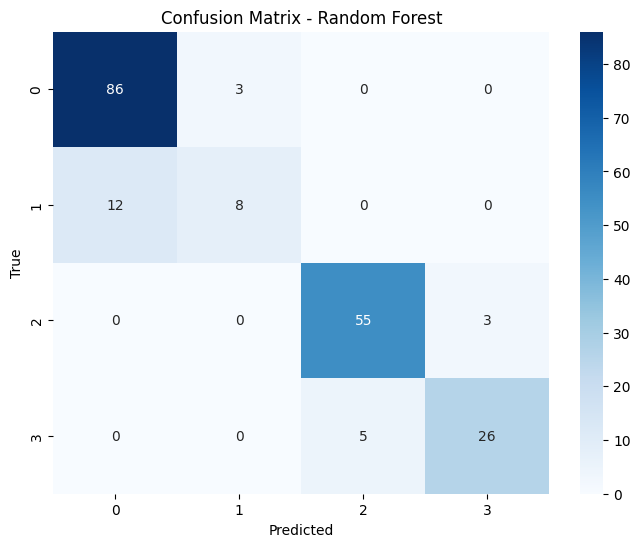

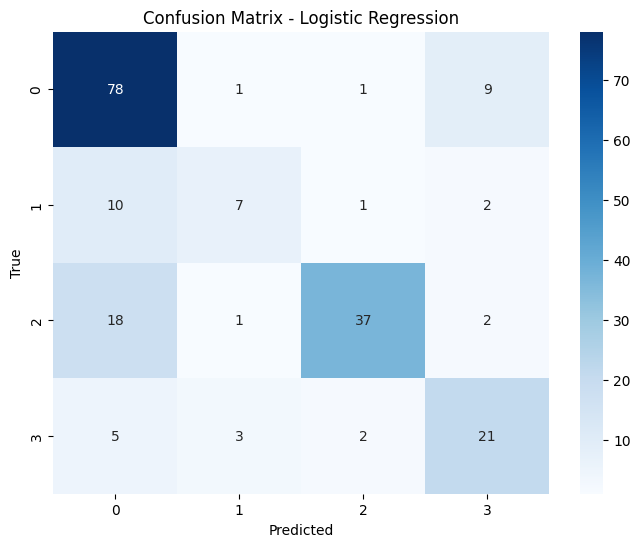

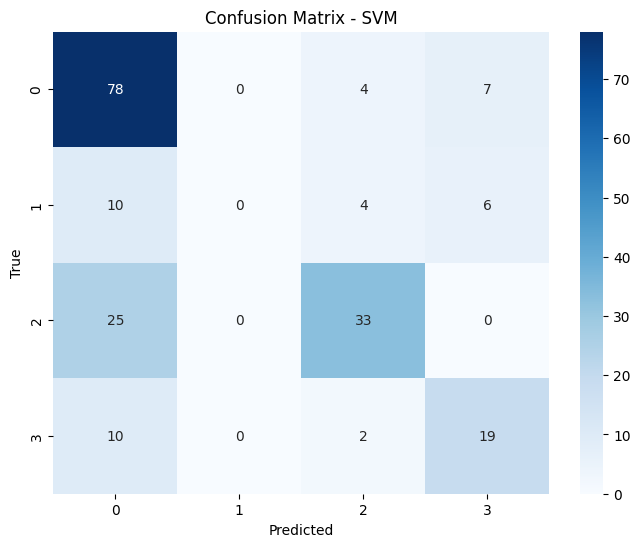

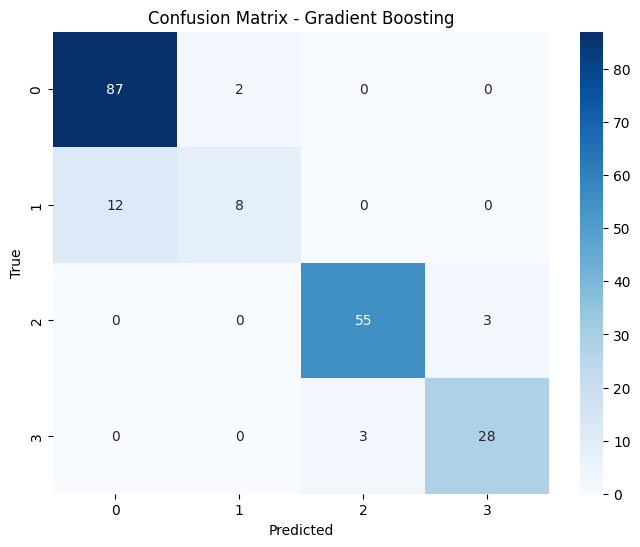

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
models = [('Random Forest', y_rf_pred),
          ('Logistic Regression', y_lr_pred),
          ('SVM', y_svm_pred),
          ('Gradient Boosting', y_gb_pred)]

# Plot confusion matrices
for model_name, y_pred in models:
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [0]:
import pandas as pd

# Sample new data for prediction
sample_new_data = pd.DataFrame({
     # Slightly cooler temperature
    'tempmin': [10.0],       # Warmer minimum temperature         # Lower average temperature
    'feelslikemax': [14.0],  # Lower "feels like" maximum temperature
    'feelslikemin': [9.0],   # Higher "feels like" minimum temperature     # Lower average "feels like" temperature           # Higher dew point
    'humidity': [80.0],      # Higher humidity
    'precip': [5.0]         # Non-zero precipitation
})

# Print the sample new data
print("Sample New Data:")
print(sample_new_data)

# Assuming you have already trained and loaded your models
# Replace 'your_model_rf', 'your_model_lr', 'your_model_svm', 'your_model_gb' with your actual model variables

# Make predictions using the 'predict' method
predicted_class_rf = rf_model.predict(sample_new_data)
predicted_class_lr = lr_model.predict(sample_new_data)
predicted_class_svm = svm_model.predict(sample_new_data)
predicted_class_gb = gb_model.predict(sample_new_data)

# Print the predictions
print("\nPredictions:")
print("Random Forest Predicted Class:", predicted_class_rf)
print("Logistic Regression Predicted Class:", predicted_class_lr)
print("SVM Predicted Class:", predicted_class_svm)
print("Gradient Boosting Predicted Class:", predicted_class_gb)


Sample New Data:
   tempmin  feelslikemax  feelslikemin  humidity  precip
0     10.0          14.0           9.0      80.0     5.0

Predictions:
Random Forest Predicted Class: [2]
Logistic Regression Predicted Class: [2]
SVM Predicted Class: [2]
Gradient Boosting Predicted Class: [2]


In [0]:
# Assuming you have a mapping of numerical labels to categorical labels
class_mapping = {0: 'Clear', 1: 'Cloudy', 2: 'Rain', 3: 'Snow'}

# Map numerical predictions to categorical labels
predicted_class_rf_categorical = [class_mapping[label] for label in predicted_class_rf]
predicted_class_lr_categorical = [class_mapping[label] for label in predicted_class_lr]
predicted_class_svm_categorical = [class_mapping[label] for label in predicted_class_svm]
predicted_class_gb_categorical = [class_mapping[label] for label in predicted_class_gb]

# Print the predictions in categorical form
print("\nPredictions (Categorical):")
print("Random Forest Predicted Class:", predicted_class_rf_categorical)
print("Logistic Regression Predicted Class:", predicted_class_lr_categorical)
print("SVM Predicted Class:", predicted_class_svm_categorical)
print("Gradient Boosting Predicted Class:", predicted_class_gb_categorical)



Predictions (Categorical):
Random Forest Predicted Class: ['Rain']
Logistic Regression Predicted Class: ['Rain']
SVM Predicted Class: ['Rain']
Gradient Boosting Predicted Class: ['Rain']


In [0]:
import pickle
with open('gb_model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)

Feature Importances:
precip: 0.5744391395893202
feelslikemin: 0.20196557925532493
feelslikemax: 0.1037315955183564
humidity: 0.06814537347188854
tempmin: 0.05171831216510979


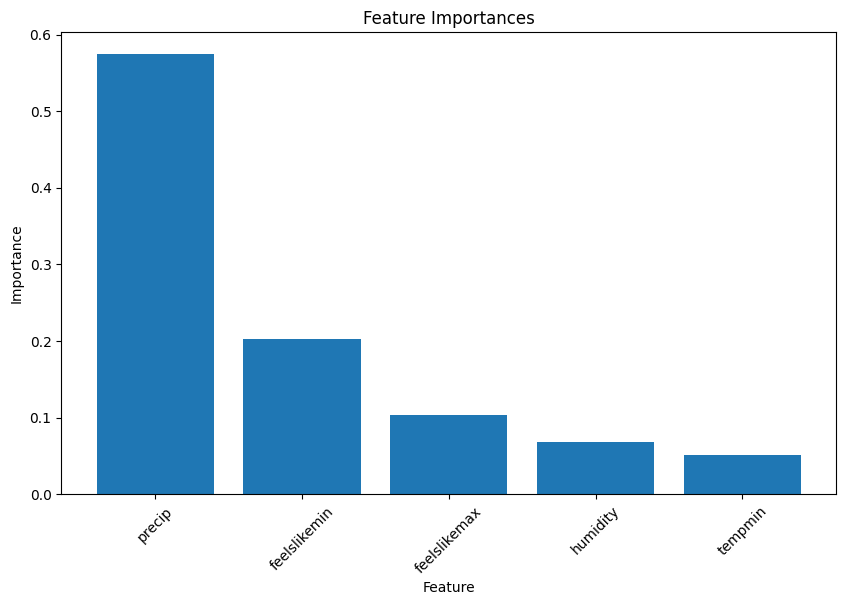

In [0]:
feature_importances = gb_model.feature_importances_

# Map feature importances to corresponding feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print and plot the feature importances
print("Feature Importances:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), [importance for feature, importance in sorted_feature_importances], align="center")
plt.xticks(range(len(feature_importances)), [feature for feature, importance in sorted_feature_importances], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()